In [ ]:
import os
import sys

from google.colab import drive
drive.mount('/content/drive/')

os.chdir("/content/drive/MyDrive/Colab Notebooks/CS535")
print(f"This is my current working directory --> {os.getcwd()}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
This is my current working directory --> /content/drive/MyDrive/Colab Notebooks/CS535


In [ ]:
import pandas as pd
import numpy as np
import io
import tarfile
import csv



# global variables
SEQ_LENGTH=20*60*100
BATCH_SIZE=15

In [ ]:
#df = pd.read_csv('combined_df.csv')
df = pd.read_csv('combined_df.csv')

In [ ]:
import pickle

#df = pd.read_pickle("combined_df.pkl")
labels = pd.read_csv('train_split.csv')

bin_series= pd.Series(labels['PHQ_Binary'].values, index=labels['Participant_ID'])
reg_series= pd.Series(labels['PHQ_Score'].values, index=labels['Participant_ID'])

df.head(3)

,Unnamed: 0,Unnamed: 0.1,name,frameTime,pcm_fftMag_mfcc[0],pcm_fftMag_mfcc[1],pcm_fftMag_mfcc[2],pcm_fftMag_mfcc[3],pcm_fftMag_mfcc[4],pcm_fftMag_mfcc[5],...,pcm_fftMag_mfcc_de_de[4],pcm_fftMag_mfcc_de_de[5],pcm_fftMag_mfcc_de_de[6],pcm_fftMag_mfcc_de_de[7],pcm_fftMag_mfcc_de_de[8],pcm_fftMag_mfcc_de_de[9],pcm_fftMag_mfcc_de_de[10],pcm_fftMag_mfcc_de_de[11],pcm_fftMag_mfcc_de_de[12],patient_id
0,0,0,'unknown',0.00,-16.49069,3.284656,-0.047574,-7.088384,1.317602,-2.347494,...,-0.151829,0.013615,-0.083641,0.354018,0.689320,-0.633814,-0.276949,-0.041297,-0.024466,302
1,1,1,'unknown',0.01,-15.73779,1.403919,-0.359134,-13.747690,-3.611933,-7.186287,...,0.459108,0.328591,-0.032162,0.518136,1.079323,-1.309899,-0.702328,-0.968478,-0.113452,302
2,2,2,'unknown',0.02,-17.67352,-2.092532,1.913712,0.046178,0.231022,-5.102201,...,0.972017,0.392305,-0.123437,0.236716,0.842740,-1.206577,-0.932375,-1.364911,-0.212339,302


In [ ]:
len(df['patient_id'].unique())

219

In [ ]:
df.head(5)

,Unnamed: 0,name,frameTime,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,...,logRelF0-H1-H2_sma3nz,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3amplitudeLogRelF0_sma3nz,patient_id
0,0,'unknown',0.00,0.050650,-16.581980,29.12192,-0.016335,0.010312,0.003262,10.706830,...,0.0,0.0,803.8763,1516.107,-201.0,1780.781,-201.0,2704.956,-201.0,302
1,1,'unknown',0.01,0.053357,-14.861850,27.29627,-0.019814,0.010204,0.005267,10.051070,...,0.0,0.0,639.0214,1568.043,-201.0,1559.670,-201.0,2456.526,-201.0,302
2,2,'unknown',0.02,0.055600,-11.754340,24.25732,-0.011439,0.012616,0.008341,9.210052,...,0.0,0.0,509.3781,1608.235,-201.0,1315.770,-201.0,2125.850,-201.0,302
3,3,'unknown',0.03,0.057076,-9.450172,19.58037,-0.010206,0.012342,0.007102,8.742709,...,0.0,0.0,502.1831,1510.600,-201.0,1434.698,-201.0,2235.370,-201.0,302
4,4,'unknown',0.04,0.055917,-8.611698,18.04498,-0.010222,0.014551,0.007270,9.253143,...,0.0,0.0,490.9701,1428.711,-201.0,1407.846,-201.0,2270.155,-201.0,302


In [ ]:
dev_labels = pd.read_csv('dev_split.csv')

dev_bin_series= pd.Series(dev_labels['PHQ_Binary'].values, index=dev_labels['Participant_ID'])
dev_reg_series= pd.Series(dev_labels['PHQ_Score'].values, index=dev_labels['Participant_ID'])


In [ ]:
df= pd.merge(df, bin_series.rename('bin'), left_on='patient_id', right_index=True)

In [ ]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,name,frameTime,pcm_fftMag_mfcc[0],pcm_fftMag_mfcc[1],pcm_fftMag_mfcc[2],pcm_fftMag_mfcc[3],pcm_fftMag_mfcc[4],pcm_fftMag_mfcc[5],...,pcm_fftMag_mfcc_de_de[5],pcm_fftMag_mfcc_de_de[6],pcm_fftMag_mfcc_de_de[7],pcm_fftMag_mfcc_de_de[8],pcm_fftMag_mfcc_de_de[9],pcm_fftMag_mfcc_de_de[10],pcm_fftMag_mfcc_de_de[11],pcm_fftMag_mfcc_de_de[12],patient_id,bin
0,0,0,'unknown',0.00,-16.49069,3.284656,-0.047574,-7.088384,1.317602,-2.347494,...,0.013615,-0.083641,0.354018,0.689320,-0.633814,-0.276949,-0.041297,-0.024466,302,0
1,1,1,'unknown',0.01,-15.73779,1.403919,-0.359134,-13.747690,-3.611933,-7.186287,...,0.328591,-0.032162,0.518136,1.079323,-1.309899,-0.702328,-0.968478,-0.113452,302,0
2,2,2,'unknown',0.02,-17.67352,-2.092532,1.913712,0.046178,0.231022,-5.102201,...,0.392305,-0.123437,0.236716,0.842740,-1.206577,-0.932375,-1.364911,-0.212339,302,0


In [ ]:
df.shape

NameError: ignored

In [ ]:
df.groupby(['patient_id']).size()
print("The data seems imbalanced :\n",bin_series.value_counts())
import plotly.express as px
fig = px.bar(df.groupby(['patient_id']).size(), color=bin_series)
fig.show()

The data seems imbalanced :
 0    126
1     37
dtype: int64


In [ ]:
df_padd=pd.DataFrame(np.zeros((len(bin_series)*SEQ_LENGTH, df.shape[1])), columns=df.columns)
for i, id in enumerate(list(set(df['patient_id']))):
    curr_df=df.loc[df['patient_id']==id].iloc[:SEQ_LENGTH]
    curr_nrow= curr_df.shape[0] if curr_df.shape[0]<=SEQ_LENGTH else SEQ_LENGTH

    df_padd.iloc[(i+1)*SEQ_LENGTH-curr_nrow: (i+1)*SEQ_LENGTH]= curr_df



In [ ]:
#random crops for data exploration
df_padd=pd.DataFrame(np.zeros((len(bin_series)*SEQ_LENGTH, df.shape[1])), columns=df.columns)
for i, id in enumerate(list(set(df['patient_id']))):
    curr_df=df.loc[df['patient_id']==id].iloc[:SEQ_LENGTH]
    curr_nrow= curr_df.shape[0] if curr_df.shape[0]<=SEQ_LENGTH else SEQ_LENGTH

    df_padd.iloc[(i+1)*SEQ_LENGTH-curr_nrow: (i+1)*SEQ_LENGTH]= curr_df



In [ ]:
df_padd.to_pickle('mfcc_df_padd.pkl')

In [ ]:
features = list(set(df.columns).difference(set(['Unnamed: 0', 'name', 'frameTime', 'patient_id', 'bin'])))

In [ ]:
df_padd = pd.read_pickle("mfcc_df_padd.pkl")

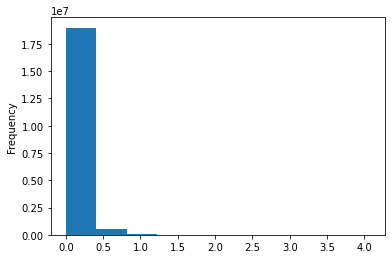

In [ ]:
df_padd["Loudness_sma3"].plot(kind="hist")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_padd.plot.hist(bins=12, alpha=0.5)

In [ ]:
sns.violinplot(x="feed", y="weight", hue="sex", data=df, split=True, linewidth=2.5,
               inner="quart", palette={"male": "b", "female": "y"})
sns.despine(left=True)
sns.violinplot(x=, y=life_exp, data=dataframe)

In [ ]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
random_crops = []
#[:1000,:]
for idx in range(0, len(df_padd), 1000):
  if idx+999 < len(df_padd) and idx < len(df_padd):
    random_crops.append(df_padd.iloc[idx:idx+999,3:])
  else:
    break

In [ ]:
random_crops[1].mean(axis=0)

Loudness_sma3                  0.0
alphaRatio_sma3                0.0
hammarbergIndex_sma3           0.0
slope0-500_sma3                0.0
slope500-1500_sma3             0.0
spectralFlux_sma3              0.0
mfcc1_sma3                     0.0
mfcc2_sma3                     0.0
mfcc3_sma3                     0.0
mfcc4_sma3                     0.0
F0semitoneFrom27.5Hz_sma3nz    0.0
jitterLocal_sma3nz             0.0
shimmerLocaldB_sma3nz          0.0
HNRdBACF_sma3nz                0.0
logRelF0-H1-H2_sma3nz          0.0
logRelF0-H1-A3_sma3nz          0.0
F1frequency_sma3nz             0.0
F1bandwidth_sma3nz             0.0
F1amplitudeLogRelF0_sma3nz     0.0
F2frequency_sma3nz             0.0
F2amplitudeLogRelF0_sma3nz     0.0
F3frequency_sma3nz             0.0
F3amplitudeLogRelF0_sma3nz     0.0
patient_id                     0.0
bin                            0.0
dtype: float64

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, df_padd):
        self.df_padd = df_padd

    def __len__(self):
        return self.df_padd.shape[0]//SEQ_LENGTH

    def __getitem__(self, idx):
        drop_cols=['Unnamed: 0', 'name', 'frameTime', 'patient_id', 'bin']
        curr_x= self.df_padd.iloc[idx*SEQ_LENGTH: (idx+1)*SEQ_LENGTH].drop(drop_cols, axis=1)
        #print(self.df_padd.iloc[idx*SEQ_LENGTH: (idx+1)*SEQ_LENGTH]['bin'])
        curr_y = np.array(int(self.df_padd.iloc[idx*SEQ_LENGTH: (idx+1)*SEQ_LENGTH]['bin'].iloc[0]))
        #print("this is curr_y ", curr_y)
        X=torch.from_numpy(curr_x.to_numpy()).float()
        y=torch.from_numpy(curr_y)

        return X, y

In [ ]:
dev_df_padd = pd.read_pickle("dev_df_padd.pkl")

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = MyDataset(df_padd)
valid_data = MyDataset(dev_df_padd)
# valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
# test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))


train_loader = DataLoader(train_data, shuffle=False, batch_size=BATCH_SIZE, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE)

In [ ]:
for X, y in train_loader:
    print("X: ", X.shape, ' y: ', len(y))
    print("---")


X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---


In [ ]:
for X, y in valid_loader:
    print("X: ", X.shape, ' y: ', len(y))
    print("---")

X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---
X:  torch.Size([15, 120000, 23])  y:  15
---


In [ ]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print()
print('Sample label size: ', sample_y.size()) # batch_size

Sample input size:  torch.Size([15, 120000, 23])

Sample label size:  torch.Size([15])


In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, output_size, drop_prob):
        super(RNN, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.drop_prob=drop_prob
        self.dropout = nn.Dropout(p=self.drop_prob)

        self.output_size = output_size
        
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.n_layers, 
                            dropout=0.3, batch_first=True)
        

        
        self.fc = nn.Linear(self.hidden_dim, self.output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        batch_size = x.size(0)

        #x = x.long()
        lstm_out, hidden = self.lstm(x, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        sig_out = self.sig(out)
        
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
input_dim = 23
hidden_dim = 64
n_layers = 1
output_size = 1
drop_prob=0.2

net = RNN(input_dim, hidden_dim, n_layers, output_size, drop_prob)

print(net)

RNN(
  (dropout): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(23, 64, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sig): Sigmoid()
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
def concordance_correlation_coefficient(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    """Concordance correlation coefficient.
    The concordance correlation coefficient is a measure of inter-rater agreement.
    It measures the deviation of the relationship between predicted and true values
    from the 45 degree angle.
    Read more: https://en.wikipedia.org/wiki/Concordance_correlation_coefficient
    Original paper: Lawrence, I., and Kuei Lin. "A concordance correlation coefficient to evaluate reproducibility." Biometrics (1989): 255-268.  
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    Returns
    -------
    loss : A float in the range [-1,1]. A value of 1 indicates perfect agreement
    between the true and the predicted values.
    Examples
    --------
    >>> from sklearn.metrics import concordance_correlation_coefficient
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> concordance_correlation_coefficient(y_true, y_pred)
    0.97678916827853024
    """
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

In [ ]:

lr=0.0001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
epochs = 20

counter = 0
print_every = 1
clip=5 # gradient clipping

if(train_on_gpu):
    net.cuda()

net.train()
h = net.init_hidden(BATCH_SIZE)
for e in range(epochs):

    
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])

        net.zero_grad()
        #print((inputs.dtype))
        #print((labels.dtype))

        output, h = net(inputs, h)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        if counter % print_every == 0:
            val_h = net.init_hidden(BATCH_SIZE)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                print(output.squeeze())
                print(labels.float())
                #val_loss = concordance_correlation_coefficient(output.squeeze(),labels.float())
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


tensor([0.5217, 0.5025, 0.4765, 0.5160, 0.5008, 0.4943, 0.5160, 0.5056, 0.5387,
        0.5435, 0.5033, 0.5172, 0.5213, 0.4931, 0.5424], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
tensor([0.5884, 0.5160, 0.4946, 0.5363, 0.5595, 0.5388, 0.5082, 0.5476, 0.5160,
        0.5188, 0.5155, 0.4958, 0.5172, 0.4954, 0.4959], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
tensor([0.4942, 0.5303, 0.5172, 0.4956, 0.4942, 0.5156, 0.5160, 0.5171, 0.5160,
        0.4957, 0.5115, 0.4943, 0.5194, 0.5155, 0.4982], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
Epoch: 1/20... Step: 1... Loss: 0.745326... Val Loss: 0.720625
tensor([0.5285, 0.4760, 0.5212, 0.5184, 0.5172, 0.5291, 0.5376, 0.5108, 0.4918,
        0.4

In [ ]:
loss

tensor(0.5144, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)